# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

In [3]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&appid="+weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | maceio
Processing Record 5 of Set 1 | zeya
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | winnemucca
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | tolanaro
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | cativa
Processing Record 13 of Set 1 | lemvig
Processing Record 14 of Set 1 | rundu
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | pinheiro
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | kargil
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | springbok
Processing Record 22 of Set 1 | iqaluit
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.62,93,100,7.60,TF,1707268671
1,nar'yan-mar,67.6713,53.0870,244.88,99,98,1.79,RU,1707268869
2,praia da vitoria,38.7333,-27.0667,291.29,82,40,10.12,PT,1707268870
3,maceio,-9.6658,-35.7353,299.84,94,20,2.06,BR,1707268425
4,zeya,53.7500,127.2667,252.31,95,100,0.63,RU,1707268594


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.62,93,100,7.60,TF,1707268671
1,nar'yan-mar,67.6713,53.0870,244.88,99,98,1.79,RU,1707268869
2,praia da vitoria,38.7333,-27.0667,291.29,82,40,10.12,PT,1707268870
3,maceio,-9.6658,-35.7353,299.84,94,20,2.06,BR,1707268425
4,zeya,53.7500,127.2667,252.31,95,100,0.63,RU,1707268594


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

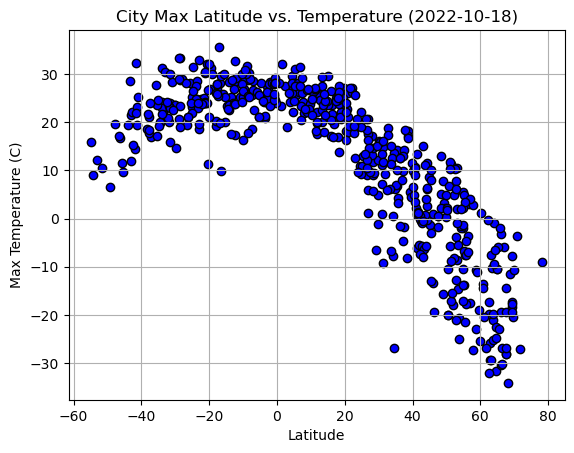

In [9]:
# Build scatter plot for latitude vs. temperature
# subtracting 273 from max temp for K to C
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"]-273,color="blue",edgecolor="black",marker="o")
# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

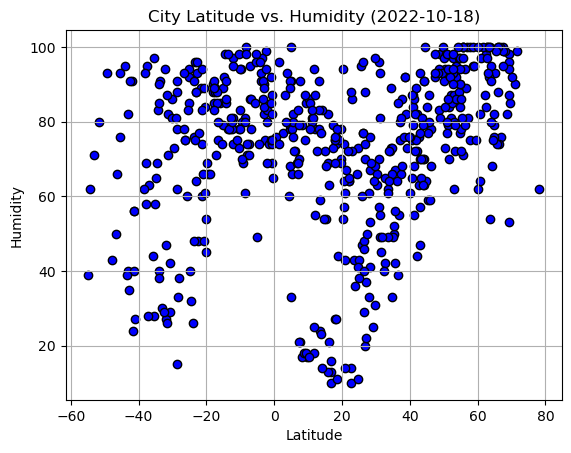

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="blue",edgecolor="black",marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

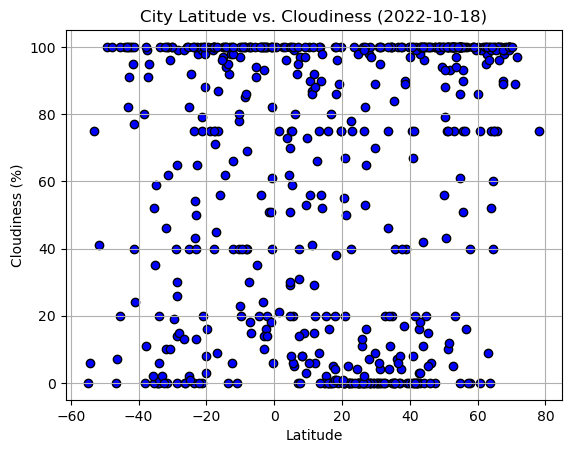

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="blue",edgecolor="black",marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

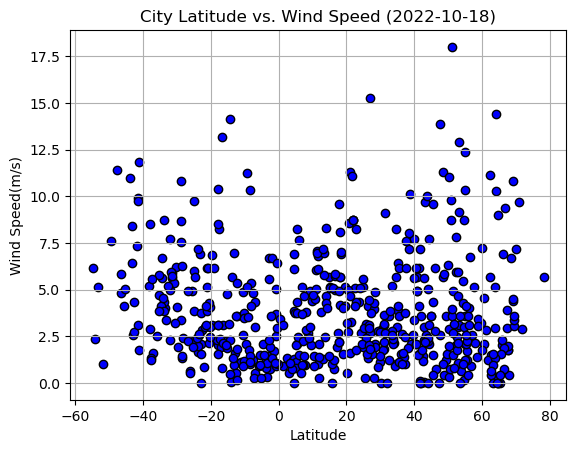

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="blue",edgecolor="black",marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_axis, y_axis, title, location, fignum):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    regression = x_axis * slope + intercept
    linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regression,"r")
    plt.annotate(linear_equation,location,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print("r="+str(rvalue))
    plt.show()
    image_name = "Fig" + str(fignum) + ".png"
    plt.savefig(image_name)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nar'yan-mar,67.6713,53.0870,244.88,99,98,1.79,RU,1707268869
2,praia da vitoria,38.7333,-27.0667,291.29,82,40,10.12,PT,1707268870
4,zeya,53.7500,127.2667,252.31,95,100,0.63,RU,1707268594
5,albany,42.6001,-73.9662,272.53,76,3,1.43,US,1707268871
6,winnemucca,40.9730,-117.7357,275.18,87,100,5.66,US,1707268829


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.62,93,100,7.60,TF,1707268671
3,maceio,-9.6658,-35.7353,299.84,94,20,2.06,BR,1707268425
7,waitangi,-43.9535,-176.5597,292.49,95,100,10.97,NZ,1707268831
8,tolanaro,-25.0319,46.9987,296.19,94,40,9.77,MG,1707268872
9,invercargill,-46.4000,168.3500,289.83,66,7,5.81,NZ,1707268837


###  Temperature vs. Latitude Linear Regression Plot

r=-0.8769240993980987


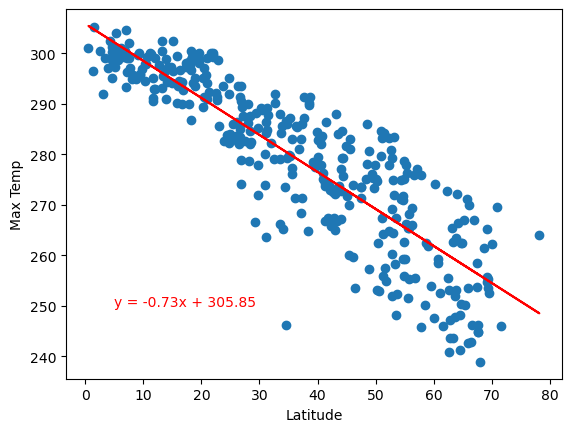

<Figure size 640x480 with 0 Axes>

In [24]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
linear_regression(x_axis,y_axis,"Max Temp",(5,250),5)

r=0.46011819557655975


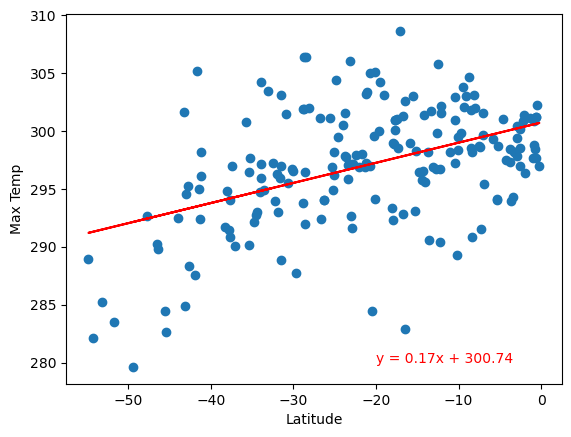

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
linear_regression(x_axis,y_axis,"Max Temp",(-20,280),6)

**Discussion about the linear relationship:** Temperatures tend to decrease as you move away from the equator. In the northern hemisphere, there is a higher R indicating higher correlation. The magnitude of slope is also higher in the north which means temperatures decrease more quickly away from the equator.

### Humidity vs. Latitude Linear Regression Plot

r=0.4491422192699142


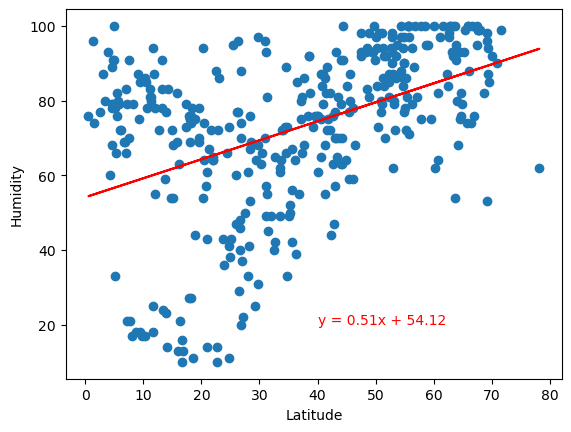

<Figure size 640x480 with 0 Axes>

In [18]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
linear_regression(x_axis,y_axis,"Humidity",(40,20),7)

r=0.4083888951830673


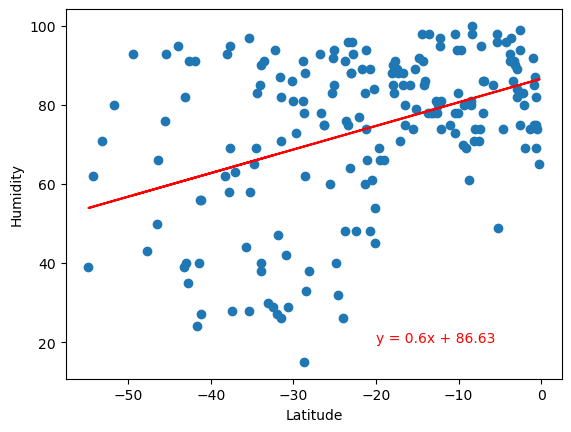

<Figure size 640x480 with 0 Axes>

In [19]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
linear_regression(x_axis,y_axis,"Humidity",(-20,20),8)

**Discussion about the linear relationship:** Overall, humidity rises as you move north across both hemispheres. Both hemispheres ave a fairly low R value indicating a weaker correlation. There appear to be a large quantity of points skewing lower much lower from the linear fit than the other points.

### Cloudiness vs. Latitude Linear Regression Plot

r=0.34757166982444127


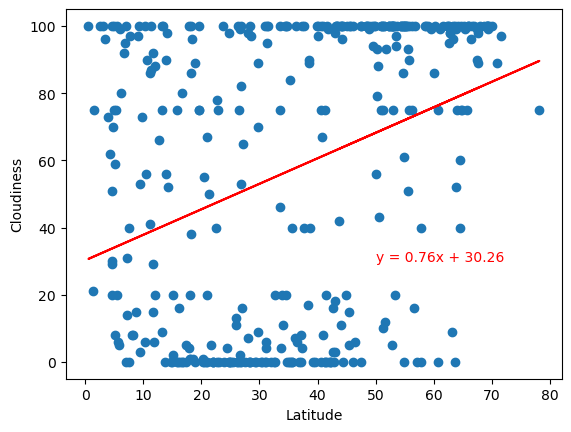

<Figure size 640x480 with 0 Axes>

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
linear_regression(x_axis,y_axis,"Cloudiness",(50,30),9)

r=0.13967079397535515


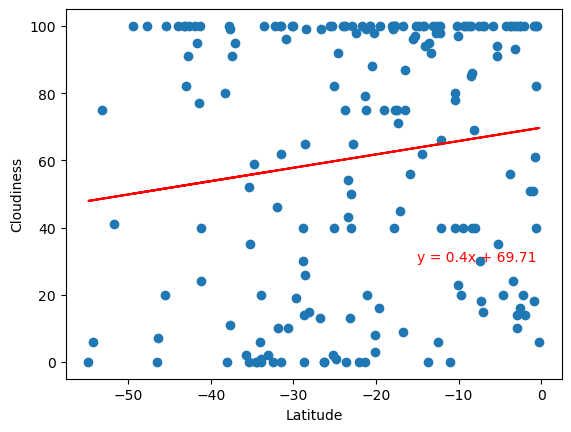

<Figure size 640x480 with 0 Axes>

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
linear_regression(x_axis,y_axis,"Cloudiness",(-15,30),10)

**Discussion about the linear relationship:** Both linear fits show a very low R value indicating a weak correlation between latitude and cloudiness. There appear to be a large number of points near 100 or 0 which could have a significant effect on the correlation.

### Wind Speed vs. Latitude Linear Regression Plot

r=0.03354535565555558


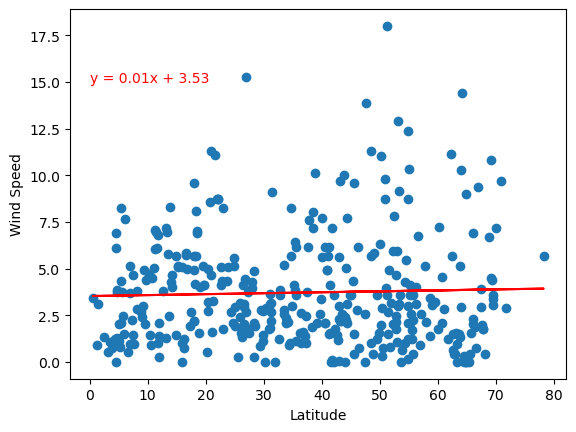

<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
linear_regression(x_axis,y_axis,"Wind Speed",(0,15),11)

r=-0.34864741337686106


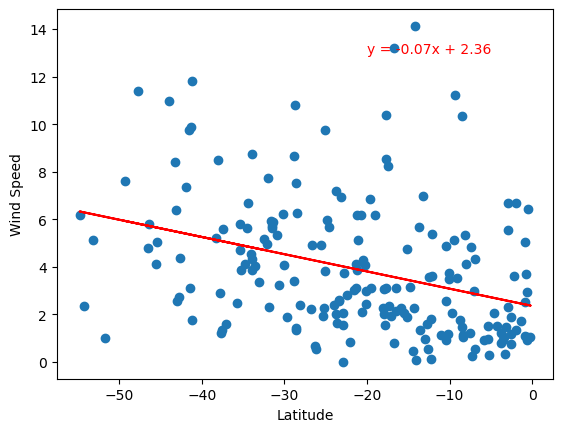

<Figure size 640x480 with 0 Axes>

In [25]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
linear_regression(x_axis,y_axis,"Wind Speed",(-20,13),12)

**Discussion about the linear relationship:** Both hemispheres show low R values again. There appears to be a wide spread of wind speed values at any latitude with most wind speeds concentrated towards lower values.